<a href="https://colab.research.google.com/github/rafli4514/Air-Quality-Data-Analysis/blob/main/air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Rafli Aulia
- **Email:** muhammadrafli.tkn@gmail.com
- **ID Dicoding:** chi1ll

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Apakah Ada Tren Kenaikan atau Penurunan Polusi dari Tahun ke Tahun?

- Pertanyaan 2: Kapan Lonjakan Polusi Terjadi di Sepanjang Hari?

- Pertanyaan 3: Apakah Kecepatan dan Arah Angin Berpengaruh pada Polusi Udara?

- Pertanyaan 4: Apakah Ada Hubungan antara Suhu dan Polusi Udara?

- Pertanyaan 5: Bagaimana Curah Hujan Mempengaruhi Tingkat Polusi?

- Pertanyaan 6: Bagaimana Polusi Berkembang Selama Pergantian Musim?

## Import Semua Packages/Library yang Digunakan

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [41]:
# membuat file path dataset
file_path = 'data/dataset.csv'

# membaca dataset dan di simpan kedalam variabel df
df = pd.read_csv(file_path)

# menampilkan dataset
print(df.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


### Assessing Data

In [42]:
# memeriksa jumlah data dan tipe data setiap kolum
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None


In [43]:
# memeriksa data yang hilang dalam dataset
print(df.isnull().sum())

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64


terdapat beberapa kolom yang memiliki missing value yaitu
PM2.5: 925 missing data

- PM10: 718 missing data
- SO2: 935 missing data
- NO2: 1023 missing data
- CO: 1776 missing data
- O3: 1719 missing data
- TEMP, PRES, DEWP, RAIN, WSPM: masing-masing memiliki sekitar 20 missing data
- wd: memiliki 81 missing data


In [44]:
# cek data duplikat dalam dataset
print(df.duplicated().sum())

0


In [45]:
print(df.describe())

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     22.823017    

### Cleaning Data

In [72]:
# mengisi data yang hilang dengan median
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
df['PM10'].fillna(df['PM10'].median(), inplace=True)
df['SO2'].fillna(df['SO2'].median(), inplace=True)
df['NO2'].fillna(df['NO2'].median(), inplace=True)
df['CO'].fillna(df['CO'].median(), inplace=True)
df['O3'].fillna(df['O3'].median(), inplace=True)
df['TEMP'].fillna(df['TEMP'].median(), inplace=True)
df['PRES'].fillna(df['PRES'].median(), inplace=True)
df['DEWP'].fillna(df['DEWP'].median(), inplace=True)
df['RAIN'].fillna(df['RAIN'].median(), inplace=True)
df['WSPM'].fillna(df['WSPM'].median(), inplace=True)

# mengisi data yang hilang dengan modus
df['wd'].fillna(df['wd'].mode()[0], inplace=True)

# menampilkan data
print("Missing Values setelah Cleaning:")
print(df.isnull().sum())

Missing Values setelah Cleaning:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


<ipython-input-72-d80e0de59498>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
<ipython-input-72-d80e0de59498>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

mengisi data yang hilangan menggunakan median karena median tidak dipengaruhi oleh outliers (nilai ekstrem). Data polusi udara sering kali memiliki nilai yang sangat tinggi atau sangat rendah, sehingga rata-rata (mean) mungkin tidak mewakili pusat distribusi dengan baik. Median memberikan gambaran yang lebih stabil terhadap distribusi data ketika ada outliers.

Modus digunakan untuk kolom kategorikal (seperti arah angin, wd) karena modus adalah nilai yang paling sering muncul. Menggunakan modus membantu memastikan nilai yang diisi lebih representatif terhadap kategori yang dominan dalam dataset, sehingga distribusi datanya tetap konsisten.

## Exploratory Data Analysis (EDA)





### Deskripsi Data

In [48]:
print(df.describe())

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      82.120075    109.588187     17.152554     59.121859   1244.561887   
std       81.142233     94.299574     22.557057    

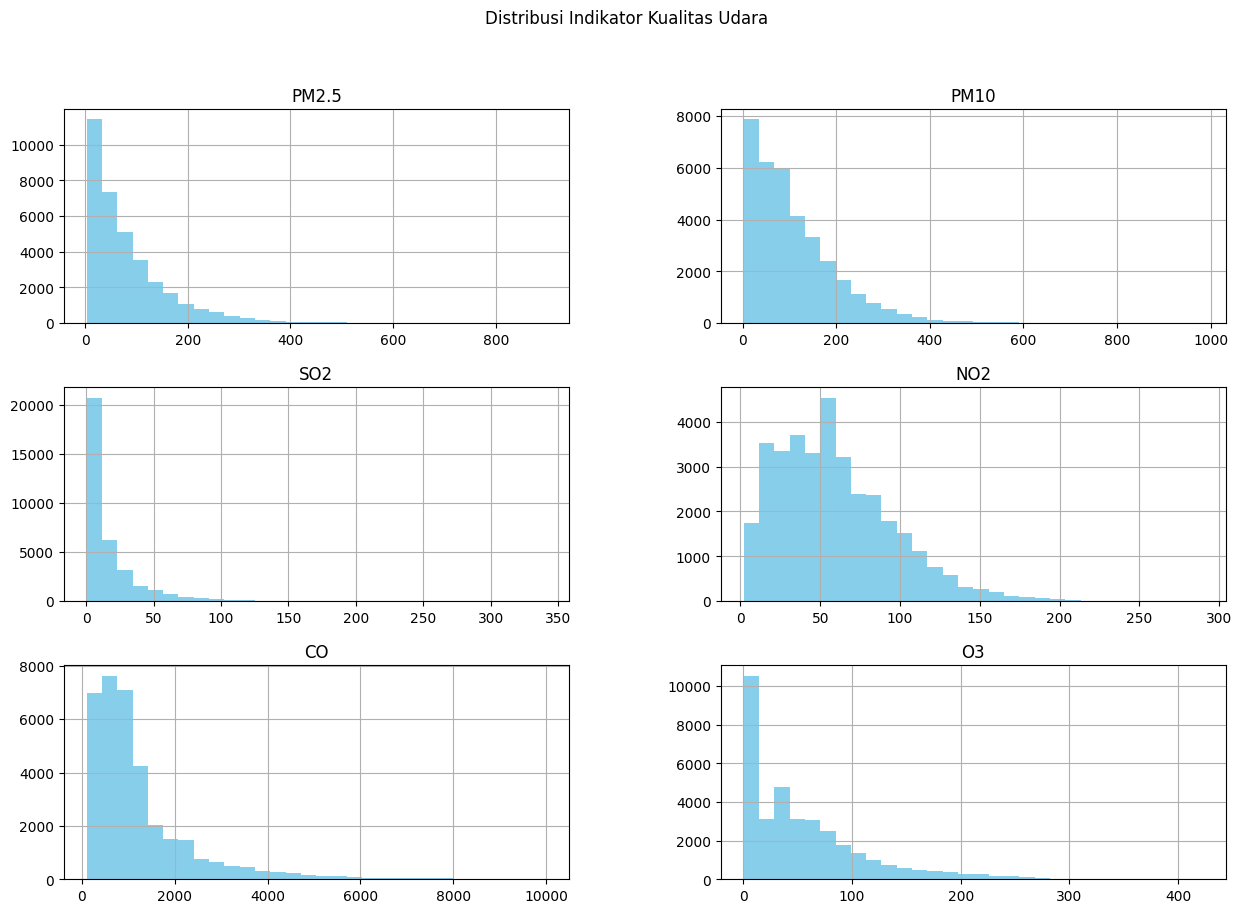

In [52]:
# grafik kualitas udara
df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].hist(bins=30, figsize=(15, 10), color='skyblue')
plt.suptitle("Distribusi Indikator Kualitas Udara")
plt.show()

### PM2.5 dan PM10
PM2.5 dan PM10 menunjukkan distribusi miring kekanan (positive skew), yang berarti sebagian besar kosentrasinya berada pada level yang rendah, dengan hanya beberapa data yang menunjukkan nilai yang sangat tinggi. keduanya juga memiliki distribusi yang mirip, tapi nilai PM10 lebih tinggi berada di kisaran 0-200 μg/m³ dibandingkan dengan PM2.5 yang nilainya berada di kisaran 0-100 μg/m³

## SO2 (Sulfur Dioksida)
Distribusi SO2 sangat miring ke kanan (positive-skew), dengan sebagian besar nilai mendekati 0 dan beberapa nilai ekstrim mendekati 70-120 μg/m³.

## NO2 (Nitrogen Dioksida)
NO2 memiliki distribusi yang sedikit lebih merata dibandingkan dengan SO2, tetapi tetap menunjukkan kemiringan ke kanan. Nilai paling umum berada di kisaran 20-80 μg/m³, menunjukkan adanya polusi NO2 yang cukup signifikan pada data ini.

## CO (Karbon Monoksida)
CO memiliki distribusi yang miring ke kanan, dengan sebagian besar data berada di bawah 2000 μg/m³.

## O3 (Ozon)
O3 memilki distribusi yang miring ke kanan, dengan sebagian besar nilainya berada di bawah 100 μg/m³

berdasarkan grafik diatas memiliki distribusi yang miring ke kanan, artinya mayoritas nilai berada di level rendah, sementara ada beberapa kejadian dengan level polusi yang sangat tinggi.

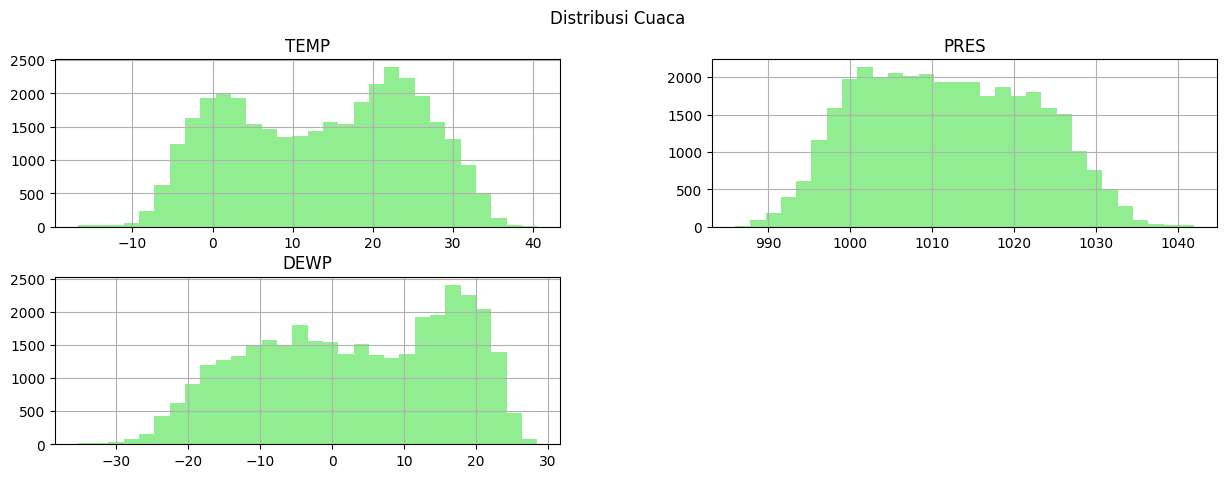

In [54]:
# grafik terkait cuaca
df[['TEMP', 'PRES', 'DEWP']].hist(bins=30, figsize=(15, 5), color='lightgreen')
plt.suptitle("Distribusi Cuaca")
plt.show()

### TEMP (Temperature)
Suhu menunjukkan bimodal distribution yaitu terdapat 2 puncak distribusi. Puncak pertama berada di kisaran -5 hingga 5 derajat celcius, sedangkan puncak kedua berada di sekitar 18 hingga 25 derajat celcius

### PRES (Pressure)
Tekanan udara memiliki distribusi mendekati bentuk normal (bell-shaped curve), dengan sebagian besar nilai berada di antara 1000 hingga 1025 hPa.

### DEWP (Dew Point)
Titik embun (DEWP) juga memiliki distribusi yang mirip dengan suhu, meskipun nilai-nilai titik embun cenderung lebih rendah. Distribusi menunjukkan banyak data di bawah 0 derajat Celsius, mengindikasikan adanya kondisi dingin dan lembap, sedangkan sebagian besar data lainnya berada di kisaran positif, sekitar 10-20 derajat Celsius.
Ini mengindikasikan berbagai kondisi kelembaban, dari kering hingga lembab.

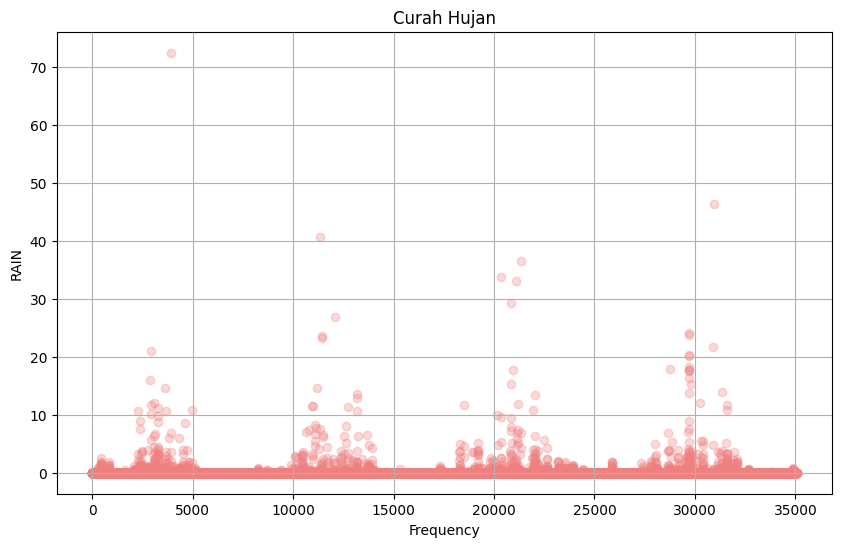

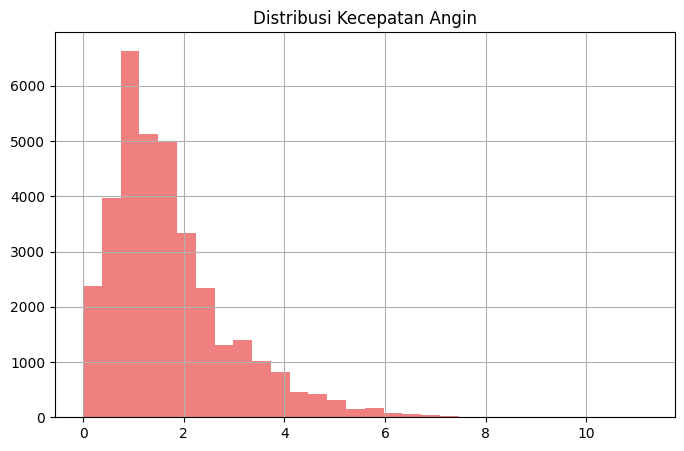

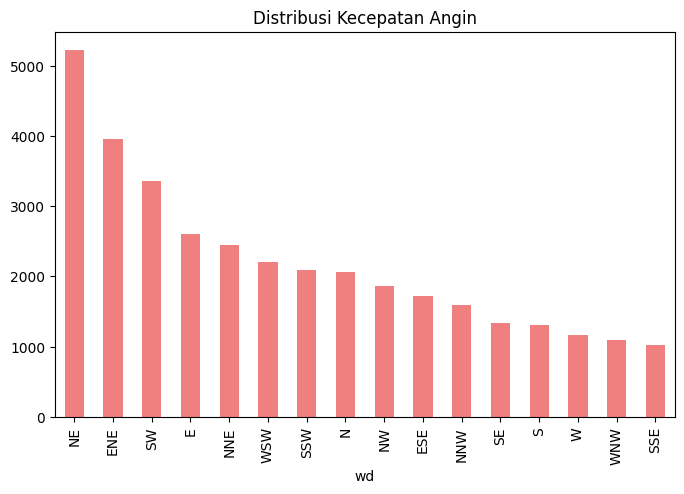

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['RAIN'], color='lightcoral', alpha=0.3)
plt.title('Curah Hujan')
plt.xlabel('Frequency')
plt.ylabel('RAIN')
plt.grid(True)
plt.show()

df['WSPM'].hist(bins=30, figsize=(8, 5), color='lightcoral')
plt.title("Distribusi Kecepatan Angin")
plt.show()

df['wd'].value_counts().plot(kind='bar', figsize=(8, 5), color='lightcoral')
plt.title("Distribusi Arah Angin")
plt.show()

# Rain
Curah hujan yang paling sering terjadi adalah 0 mm, yang berarti hari-hari tanpa hujan mendominasi dataset. Hujan dengan intensitas tinggi (lebih dari 20 mm) jarang terjadi, namun kejadian tersebut tercatat beberapa kali. Distribusi curah hujan secara keseluruhan menunjukkan bahwa sebagian besar kejadian hujan adalah hujan ringan hingga sedang.

### WSPM
Distribusi ini miring ke kanan (positive-skewed), Sebagian besar pengamatan menunjukkan kecepatan angin yang rendah, antara 0 hingga 3 m/s, mengindikasikan kondisi angin yang tenang. Kejadian angin yang lebih kencang (di atas 4 m/s) sangat jarang.

### WD
Arah angin paling dominan berasal dari timur laut (NE), dengan lebih dari 5000 observasi, menjadikannya arah angin yang paling sering terjadi dalam dataset ini. Setelah itu, angin yang berasal dari ENE (timur-timur laut) dan SW (barat daya) juga cukup sering terjadi, dengan frekuensi yang signifikan. Arah angin tersebar dalam berbagai arah, namun beberapa arah seperti NE, ENE, dan SW jauh lebih dominan dibandingkan arah lainnya.
Arah angin yang paling jarang terjadi adalah dari SSE (selatan-selatan timur) dan WNW (barat-barat laut), dengan kurang dari 1000.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah Ada Tren Kenaikan atau Penurunan Polusi dari Tahun ke Tahun?


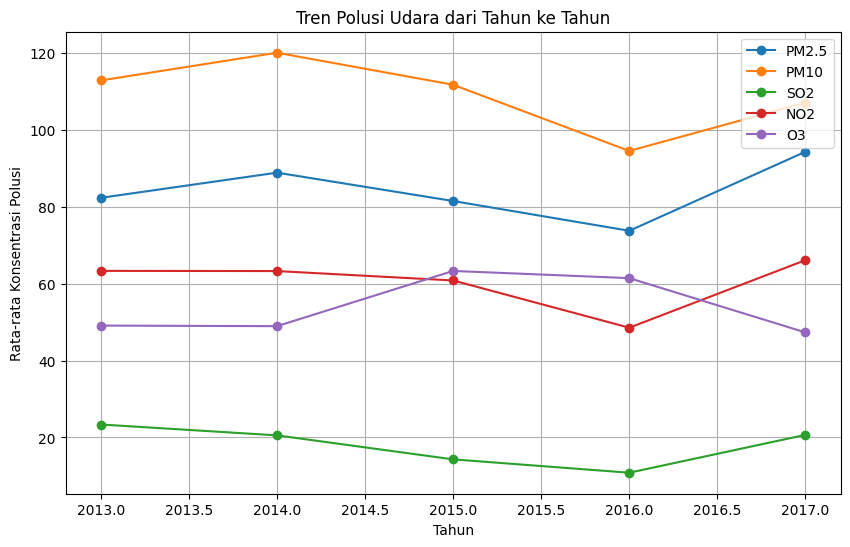

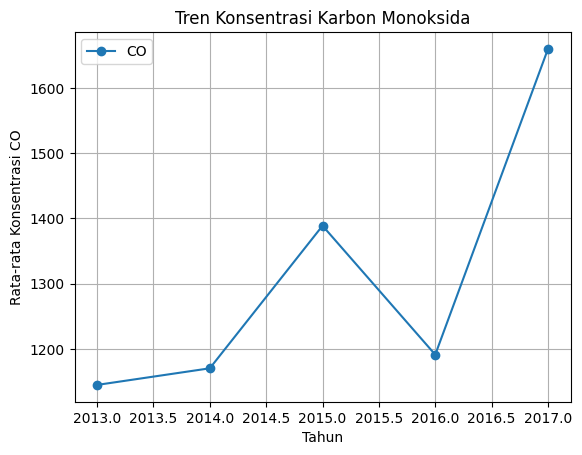

In [91]:
# Menghitung rata-rata polusi untuk setiap tahun
data_tahunan = df.select_dtypes(include=['float64', 'int64']).groupby(df['year']).mean()

# Membuat line chart untuk setiap polutan
plt.figure(figsize=(10, 6))
plt.plot(data_tahunan.index, data_tahunan['PM2.5'], label='PM2.5', marker='o')
plt.plot(data_tahunan.index, data_tahunan['PM10'], label='PM10', marker='o')
plt.plot(data_tahunan.index, data_tahunan['SO2'], label='SO2', marker='o')
plt.plot(data_tahunan.index, data_tahunan['NO2'], label='NO2', marker='o')
plt.plot(data_tahunan.index, data_tahunan['O3'], label='O3', marker='o')

plt.title('Tren Polusi Udara dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Konsentrasi Polusi')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(data_tahunan.index, data_tahunan['CO'], label='CO', marker='o')
plt.title('Tren Konsentrasi Karbon Monoksida')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Konsentrasi CO')
plt.legend()
plt.grid(True)
plt.show()

- PM2.5 menunjukkan fluktuasi yang cenderung stabil dari tahun 2013 hingga 2017. Ada sedikit penurunan pada tahun 2015, tetapi meningkat kembali di 2016 dan 2017.

- PM10 memiliki pola yang hampir mirip dengan PM2.5, tetapi konsentrasinya lebih tinggi. Ada kenaikan yang cukup signifikan pada tahun 2014 dan menurun setelahnya. tetapi menningkat kembali di 2016-2017

- SO2 menurun secara bertahap dari 2013 sampai 2016 tetapi mengalami peningkatan di 2017 sampai mencapai 20 µg/m³.

- NO2 menunjukkan tren yang relatif stabil, dengan sedikit penurunan di tahun 2015 dan kemudian mengalami kenaikan lagi di 2016

- Ozon cenderung mengalami sedikit kenaikan pada 2015 dan 2016, tetapi naik kembali pada 2017.

- Konsentrasi CO cenderung stabil dari tahun 2013 hingga 2014, tetapi terjadi kenaikan signifikan pada tahun 2015 dan sempai mengalami penurunan di 2016, tetapi di 2017 CO mengalami kenaikan yang sangat signifikan.

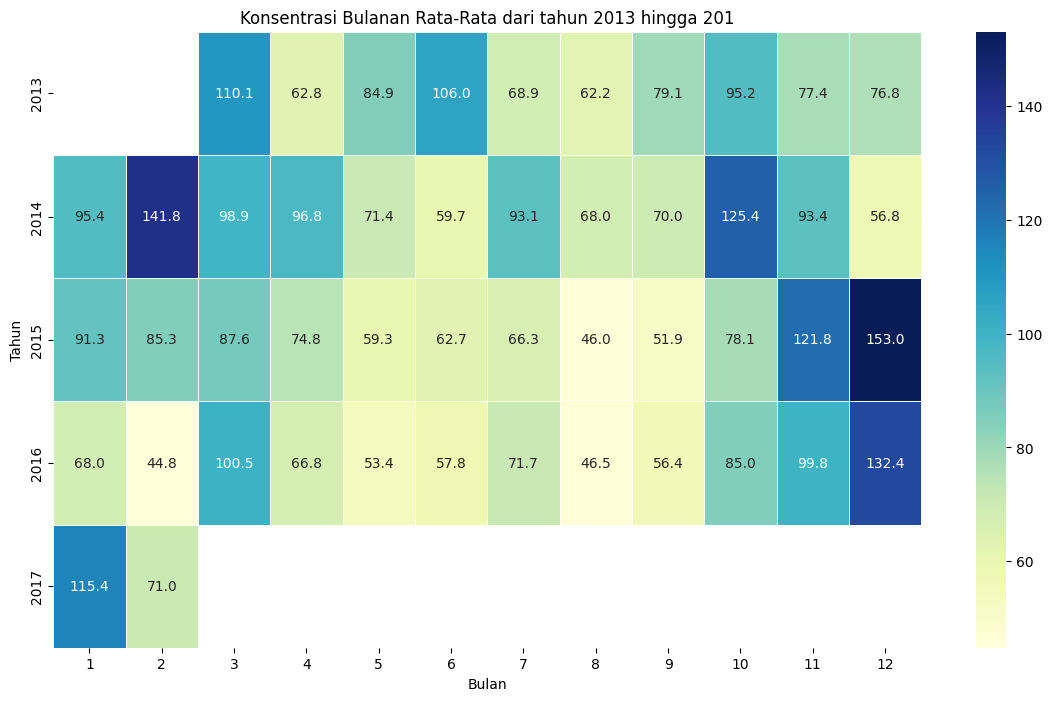

In [94]:
monthly_avg_pm25_by_year = df.groupby(['year', 'month'])['PM2.5'].mean().reset_index()
monthly_avg_pm25_pivot = monthly_avg_pm25_by_year.pivot(index='year', columns='month', values='PM2.5')

plt.figure(figsize=(14, 8))
sns.heatmap(monthly_avg_pm25_pivot, annot=True, fmt=".1f", cmap='YlGnBu', linewidths=0.5)
plt.title('Konsentrasi Bulanan Rata-Rata dari tahun 2013 hingga 2017')
plt.xlabel('Bulan')
plt.ylabel('Tahun')
plt.show()

### Pertanyaan 2: Kapan Lonjakan Polusi Terjadi di Sepanjang Hari?


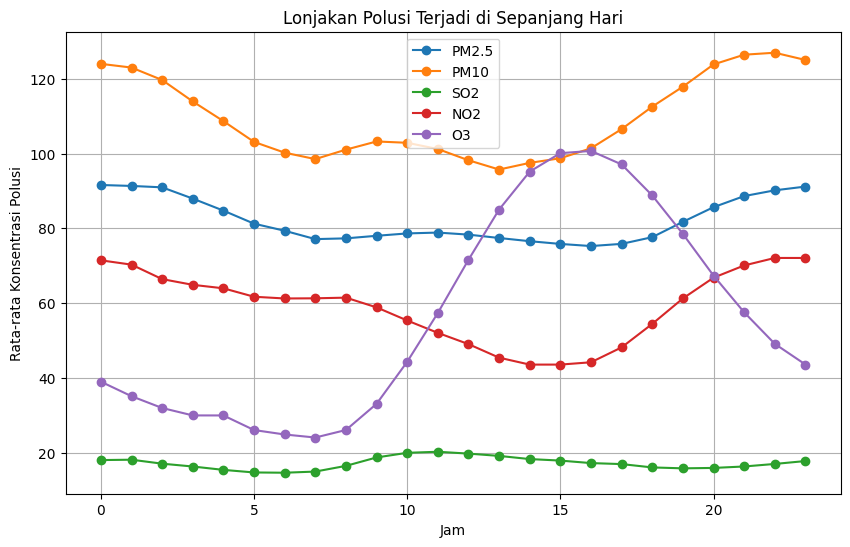

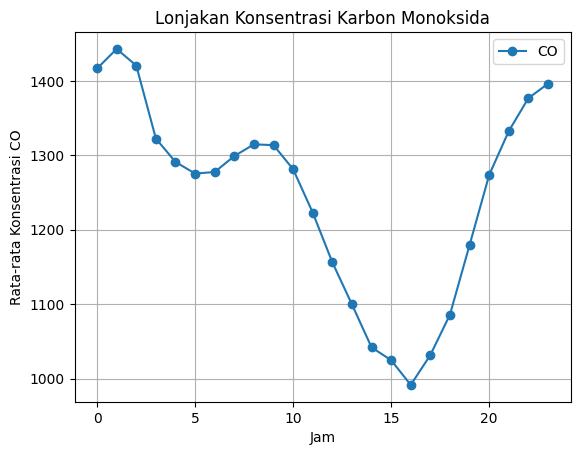

In [97]:
# menghitung rata-rata polusi untuk setiap jam
hourly_data = df.select_dtypes(include=['float64', 'int64']).groupby(df['hour']).mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index, hourly_data['PM2.5'], label='PM2.5', marker='o')
plt.plot(hourly_data.index, hourly_data['PM10'], label='PM10', marker='o')
plt.plot(hourly_data.index, hourly_data['SO2'], label='SO2', marker='o')
plt.plot(hourly_data.index, hourly_data['NO2'], label='NO2', marker='o')
plt.plot(hourly_data.index, hourly_data['O3'], label='O3', marker='o')
plt.title('Lonjakan Polusi Terjadi di Sepanjang Hari')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Konsentrasi Polusi')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(hourly_data.index, hourly_data['CO'], label='CO', marker='o')
plt.title('Lonjakan Konsentrasi Karbon Monoksida')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Konsentrasi CO')
plt.legend()
plt.grid(True)
plt.show()

- PM2.5 dan PM10 menunjukkan pola yang mirip, dengan konsentrasi yang relatif tinggi sepanjang hari. Konsentrasi PM10 lebih tinggi dibandingkan dengan PM2.5, yang diharapkan karena partikel PM10 lebih besar. Lonjakan konsentrasi polutan ini terjadi pada pagi hari (sekitar jam 6-9), yang mungkin berhubungan dengan peningkatan aktivitas manusia, seperti kendaraan bermotor dan industri. Konsentrasi menurun secara bertahap setelah jam sibuk pagi dan meningkat lagi di sore hari (sekitar jam 18-21), yang juga bertepatan dengan jam sibuk kedua.

- SO2 memiliki konsentrasi yang relatif rendah dan stabil sepanjang hari. Ini mungkin menunjukkan bahwa sumber polusi SO2 lebih terkendali atau tidak terlalu bergantung pada waktu hari. Ada sedikit penurunan konsentrasi di pagi hari dan peningkatan kecil di sore hari, tetapi trennya relatif datar.

- NO2 memiliki pola yang mirip dengan PM2.5 dan PM10, dengan peningkatan pada pagi hari (sekitar jam 7-9) dan malam hari (sekitar jam 19-21). Ini menunjukkan hubungan kuat dengan lalu lintas kendaraan, karena NO2 adalah polutan yang dihasilkan dari pembakaran bahan bakar, terutama dari kendaraan bermotor.

- Ozon menunjukkan pola yang sangat berbeda dari polutan lainnya. Konsentrasi ozon rendah pada pagi hari dan meningkat secara signifikan pada siang hari (sekitar jam 10-16). uncak konsentrasi ozon biasanya terjadi pada siang hari karena reaksi kimia yang dipicu oleh sinar matahari. Setelah itu, konsentrasi ozon turun kembali saat matahari terbenam.

- CO menunjukkan pola yang mirip dengan polutan PM2.5 dan NO2, dengan dua puncak lonjakan yang terjadi pada jam 6-9 pagi dan jam 18-21 malam. Konsentrasi CO menurun secara signifikan pada siang hari (sekitar jam 12-17). Lonjakan konsentrasi di pagi dan sore hari kemungkinan besar disebabkan oleh peningkatan lalu lintas kendaraan bermotor, yang merupakan sumber utama karbon monoksida.


### Pertanyaan 3: Apakah Kecepatan dan Arah Angin Berpengaruh pada Polusi Udara?

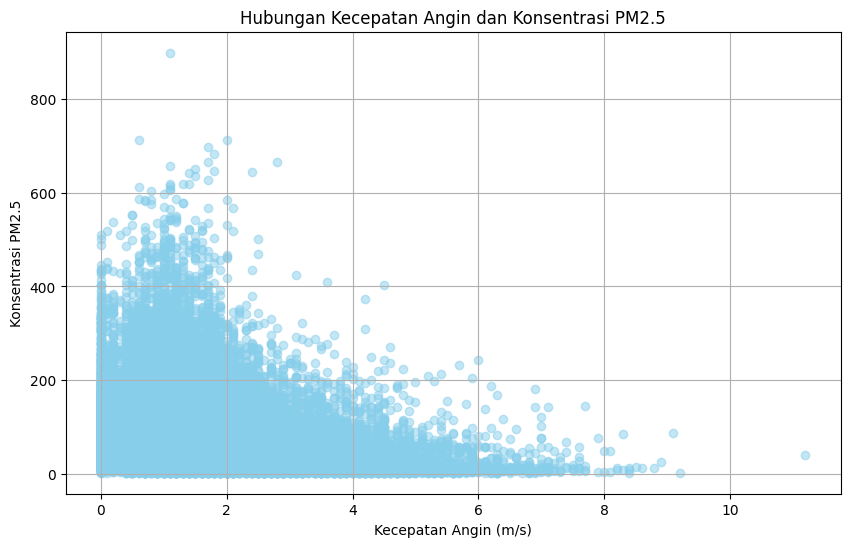

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(df['WSPM'], df['PM2.5'], alpha=0.5, color='skyblue')
plt.title('Hubungan Kecepatan Angin dan Konsentrasi PM2.5')
plt.xlabel('Kecepatan Angin (m/s)')
plt.ylabel('Konsentrasi PM2.5')
plt.grid(True)
plt.show()

Pada kecepatan angin rendah (di bawah 2 m/s), terdapat konsentrasi PM2.5 yang sangat tinggi. Konsentrasi bisa mencapai lebih dari 600 µg/m³ ketika angin lemah. Ketika kecepatan angin meningkat (lebih dari 4 m/s), konsentrasi PM2.5 mulai menurun secara signifikan, dengan nilai-nilai yang mendekati 0 µg/m³ pada kecepatan angin yang tinggi.

<Figure size 1000x600 with 0 Axes>

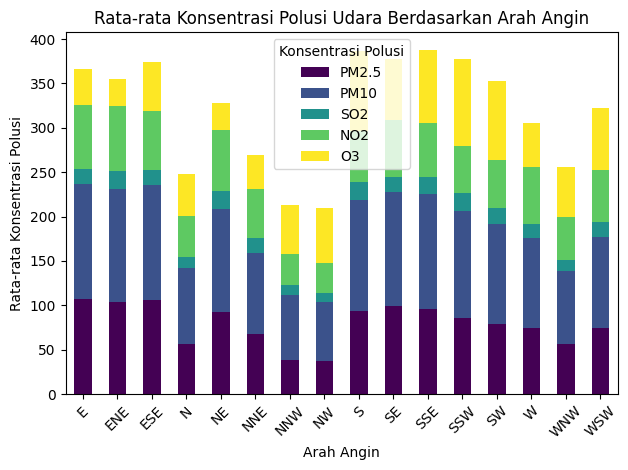

In [101]:
# Menghitung rata-rata polusi berdasarkan arah angin untuk beberapa polutan
wind_direction_counts = df.groupby('wd')[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].mean()

# Membuat bar chart stacked untuk visualisasi polusi udara berdasarkan arah angin
plt.figure(figsize=(10, 6))
wind_direction_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Rata-rata Konsentrasi Polusi Udara Berdasarkan Arah Angin')
plt.xlabel('Arah Angin')
plt.ylabel('Rata-rata Konsentrasi Polusi')
plt.legend(title='Konsentrasi Polusi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- Konsentrasi PM2.5 (ungu) dan PM10 (biru) terlihat signifikan pada hampir semua arah angin, namun arah angin ENE (Timur-Timur Laut), S (Selatan), dan SSW (Selatan-Selatan Barat) menunjukkan konsentrasi PM10 yang lebih tinggi dibandingkan dengan arah lainnya. Arah angin dari ENE dan S mungkin membawa polutan dari sumber yang lebih intens, seperti kawasan industri atau lalu lintas kendaraan.

- Konsentrasi SO2 (cyan) terlihat paling tinggi pada arah ENE dan NNW (Utara-Barat Laut). Ini mungkin menunjukkan adanya sumber polusi sulfur di daerah-daerah yang dilalui oleh angin dari arah tersebut, seperti pembakaran bahan bakar fosil atau kegiatan industri yang menghasilkan sulfur dioksida.

- NO2 (hijau) cenderung lebih tinggi pada arah ENE, NNW, dan SSW, yang mungkin menunjukkan hubungan dengan lalu lintas kendaraan atau aktivitas industri, karena NO2 biasanya dihasilkan dari pembakaran bahan bakar.

- Konsentrasi Ozon (O3) (kuning) cukup tinggi di berbagai arah, dengan konsentrasi terbesar pada arah ENE, SSE, dan S. Polutan Ozon dapat meningkat pada kondisi sinar matahari yang intens, jadi mungkin ini menunjukkan hubungan antara sinar matahari dan arah angin yang membantu menyebarkan ozon ke berbagai wilayah.



### Pertanyaan 4: Apakah Ada Hubungan antara Suhu dan Polusi Udara?

<ipython-input-105-8cd28395558f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlation_temp = df.groupby('TEMP_bins')[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].mean()


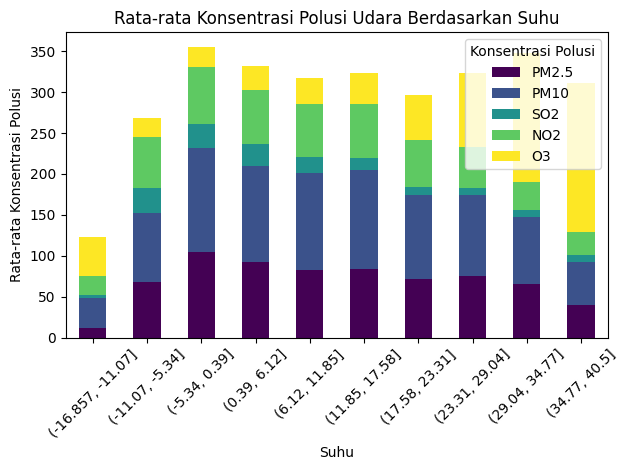

In [105]:
# Mengelompokkan nilai suhu menjadi 10 kategori
df['TEMP_bins'] = pd.cut(df['TEMP'], bins=10)

# Menghitung rata-rata polusi berdasarkan kategori suhu
correlation_temp = df.groupby('TEMP_bins')[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].mean()
correlation_temp.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Rata-rata Konsentrasi Polusi Udara Berdasarkan Suhu')
plt.xlabel('Suhu')
plt.ylabel('Rata-rata Konsentrasi Polusi')
plt.legend(title='Konsentrasi Polusi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- PM2.5 (ungu) dan PM10 (biru) menunjukkan pola yang mirip di semua rentang suhu. Konsentrasi PM2.5 dan PM10 cenderung lebih tinggi pada suhu yang lebih rendah dan menurun seiring dengan kenaikan suhu.
Pada rentang suhu yang lebih rendah (-11°C hingga 5°C), konsentrasi polutan partikulat sangat tinggi, dengan penurunan yang terlihat pada suhu di atas 23°C.

- SO2 (cyan) juga menunjukkan pola yang serupa, dengan konsentrasi yang lebih tinggi pada suhu yang lebih rendah. Konsentrasi SO2 secara bertahap menurun saat suhu meningkat.

- NO2 (hijau) juga memiliki konsentrasi yang lebih tinggi pada suhu rendah dan menurun pada suhu yang lebih tinggi. Seperti SO2, polutan ini sering dikaitkan dengan aktivitas industri dan lalu lintas, yang lebih terperangkap di permukaan ketika suhu rendah.

- Ozon (O3) (kuning) menunjukkan pola yang berbeda dari polutan lainnya. Ozon cenderung lebih tinggi pada suhu yang lebih tinggi, terutama pada suhu di atas 29°C.

### Pertanyaan 5: Bagaimana Curah Hujan Mempengaruhi Tingkat Polusi?

<ipython-input-113-6a16099a6ac6>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlation_rain = df.groupby('RAIN_bins')[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].mean()


<Figure size 1000x600 with 0 Axes>

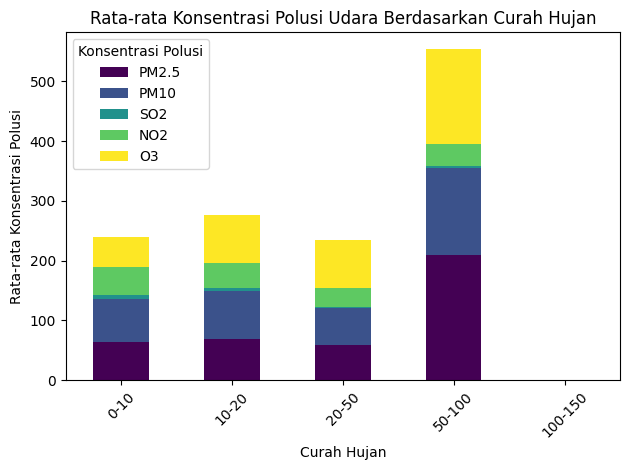

In [113]:
# Mengelompokkan nilai curah hujan menjadi 10 kategori
df['RAIN_bins'] = pd.cut(df['RAIN'], bins=[0, 10, 20, 50, 100, 150], labels=['0-10', '10-20', '20-50', '50-100', '100-150'])

# Menghitung rata-rata polusi berdasarkan kategori curah hujan
correlation_rain = df.groupby('RAIN_bins')[['PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].mean()

plt.figure(figsize=(10, 6))
correlation_rain.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Rata-rata Konsentrasi Polusi Udara Berdasarkan Curah Hujan')
plt.xlabel('Curah Hujan')
plt.ylabel('Rata-rata Konsentrasi Polusi')
plt.legend(title='Konsentrasi Polusi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pada tingkat curah hujan rendah hingga sedang (0-50 mm), konsentrasi polutan seperti PM2.5, PM10, SO2, NO2, dan O3 relatif stabil. Tidak ada perbedaan signifikan dalam konsentrasi polutan antara kategori curah hujan rendah hingga menengah. Pada curah hujan yang lebih tinggi (50-100 mm), terjadi lonjakan signifikan dalam konsentrasi polutan, terutama pada PM2.5, PM10, dan O3.

## Conclusion

- Conclution pertanyaan 1:
tidak ada tren penurunan signifikan untuk semua polutan dari tahun ke tahun. PM2.5 dan PM10 tetap berada pada level tinggi dan relatif stabil, dengan sedikit fluktuasi di beberapa tahun. Polutan SO2 menunjukkan penurunan yang konsisten, yang mengindikasikan adanya keberhasilan dalam pengendalian emisi sulfur. Namun, polusi CO menunjukkan lonjakan besar di tahun 2017, yang menandakan peningkatan emisi kendaraan bermotor atau sumber pembakaran lainnya.

- Conclution pertanyaan 2:
Lonjakan polusi udara terutama terjadi pada jam sibuk pagi (sekitar jam 6-9) dan jam sibuk sore (sekitar jam 18-21). Polutan seperti PM2.5, PM10, NO2, dan CO menunjukkan peningkatan selama jam-jam sibuk, yang berkaitan dengan peningkatan aktivitas kendaraan dan industri. Ozon (O3) memiliki pola yang berbeda, dengan lonjakan yang terjadi di siang hari (sekitar jam 10-16) karena reaksi fotokimia yang dipicu oleh sinar matahari.

- Conclution pertanyaan 3:
Kecepatan angin memiliki hubungan negatif dengan konsentrasi polusi udara, terutama untuk PM2.5. Semakin tinggi kecepatan angin, semakin rendah konsentrasi polusi karena angin membantu mendispersikan polutan. Arah angin seperti ENE (Timur-Timur Laut) dan S (Selatan) cenderung membawa polusi lebih tinggi, yang menunjukkan bahwa sumber-sumber polusi berada di jalur angin dari arah tersebut.

- Conclution pertanyaan 4:
Terdapat hubungan negatif antara suhu dan konsentrasi polutan seperti PM2.5, PM10, SO2, dan NO2. Pada suhu rendah, polutan ini cenderung terperangkap di lapisan bawah atmosfer, sehingga konsentrasinya lebih tinggi. Sebaliknya, Ozon (O3) menunjukkan hubungan positif dengan suhu, di mana konsentrasinya meningkat pada suhu yang lebih tinggi, terutama di atas 29°C, karena meningkatnya reaksi fotokimia.

- Conclution pertanyaan 5:
Curah hujan tidak selalu efektif dalam menurunkan konsentrasi polusi, terutama pada tingkat curah hujan rendah hingga sedang (0-50 mm). Pada tingkat curah hujan lebih tinggi (50-100 mm), justru terjadi lonjakan konsentrasi polutan seperti PM2.5, PM10, dan O3, yang menunjukkan bahwa kondisi atmosfer tertentu mungkin menyebabkan polusi kembali tersuspensi ke udara. Ozon (O3) tetap tinggi bahkan pada curah hujan yang intens, menunjukkan bahwa reaksi kimia penghasil ozon masih terjadi meskipun ada hujan.